In [117]:
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


In [118]:
df = pd.read_csv("../Training 1/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [119]:
#drop the unnamed column
df=df.drop('Unnamed: 0',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [120]:
df.shape # check the shape of the dataset

(53940, 10)

## Histogram

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

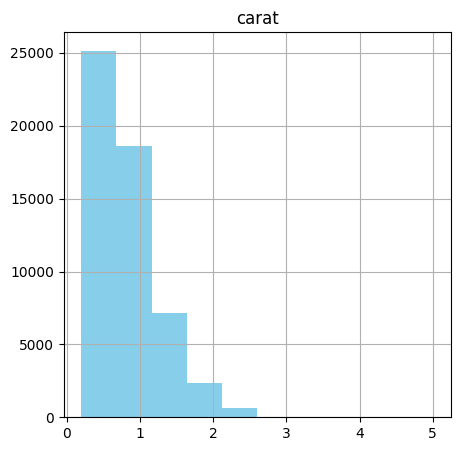

In [121]:
# getting a sense of the carat distribution across the dataset
df.hist(
    column='carat',
    figsize=(5,5),
    color='skyblue'
)

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

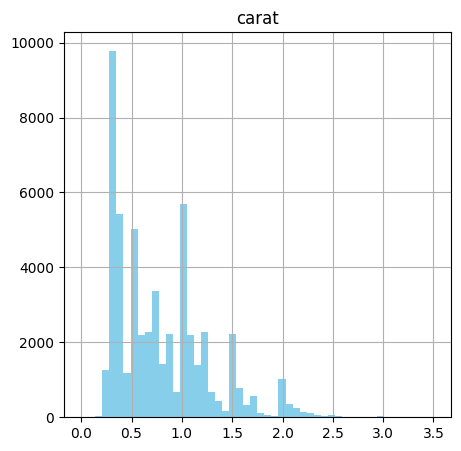

In [122]:
# gain better control over the subtleties within the distibution
df.hist(
    column='carat',
    figsize=(5,5),
    color='skyblue',
    bins=50,
    range=(0,3.5)
)

In [123]:
# just to ensure theres no outliers outside of 3.5
df[df['carat']>3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


## Boxplots

<Axes: >

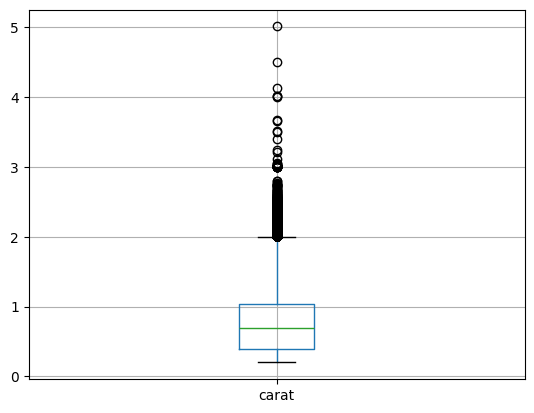

In [124]:
df.boxplot('carat')

<Axes: xlabel='clarity', ylabel='price'>

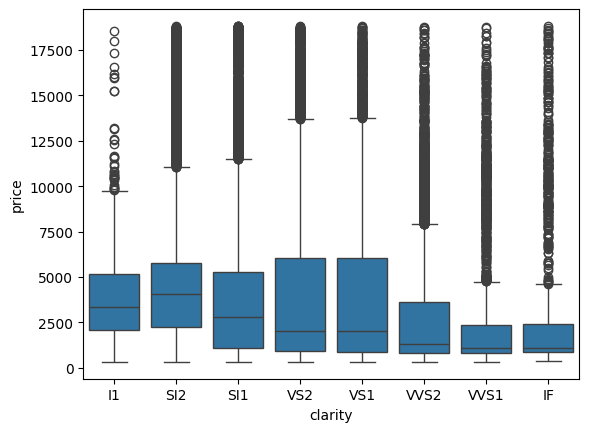

In [125]:
# takes each categorical variable and compare side by side the price
order=["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
sns.boxplot(x='clarity',
            y='price',
            data=df,
            order=order
)

In [126]:
# turns out that internally flawless (IF), highest end of clarity spectrum actually have lower median price than low clarity diamonds (I1)
# worst clarity to best (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

<Axes: xlabel='clarity', ylabel='carat'>

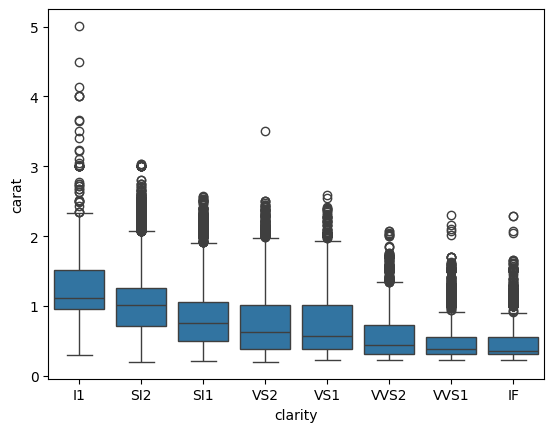

In [127]:
# compare clarity categories by carat size
sns.boxplot(
            x='clarity',
            y='carat',
            data=df,
            order=order
)

In [128]:
# The plot above shows that diamonds with low clarity ratings also tend to be larger.

## Density Plots

In [129]:
# similar to histogram, looking into the distribution of a numeric value, but not within discrete bins, allows further visualisation of the underslying shape of the data

Defaulting to user installation because normal site-packages is not writeable


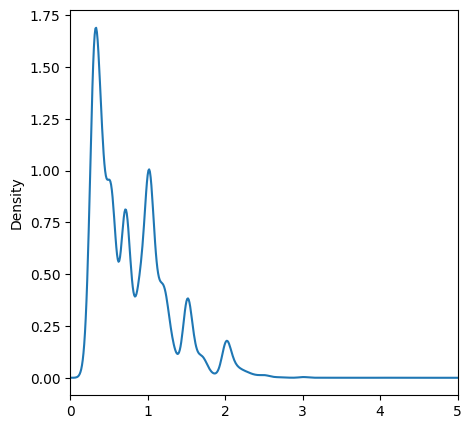

In [130]:
!pip install scipy
df['carat'].plot.density(
    figsize=(5,5)
                 )
plt.xlim(0,5)
plt.show()

## Barplots

In [131]:
carat_table=pd.crosstab(df['clarity'], columns='count')
carat_table

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


<Axes: xlabel='clarity'>

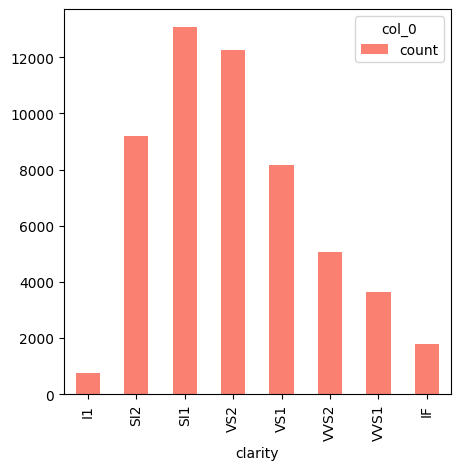

In [132]:
carat_table = carat_table.reindex(order)
carat_table.plot(
    kind='bar',
    figsize=(5,5),
    color='salmon' 
)

In [133]:
# create subset of the data that ouitlines clarity for each color grades
carat_table=pd.crosstab(index=df['clarity'],
            columns=df['color'])
carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


<Axes: xlabel='clarity'>

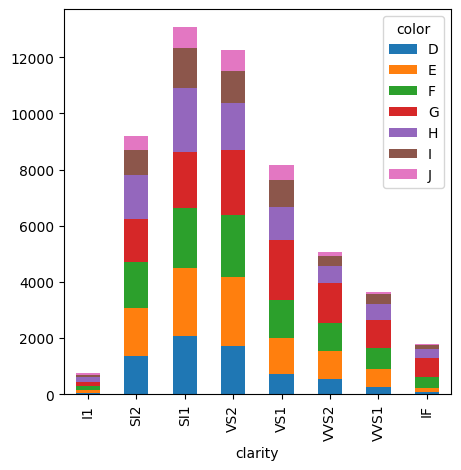

In [134]:
#create a stacked bar plot
carat_table = carat_table.reindex(order)
carat_table.plot(
    kind='bar',
    figsize=(5,5),
    stacked=True,
)

<Axes: xlabel='clarity'>

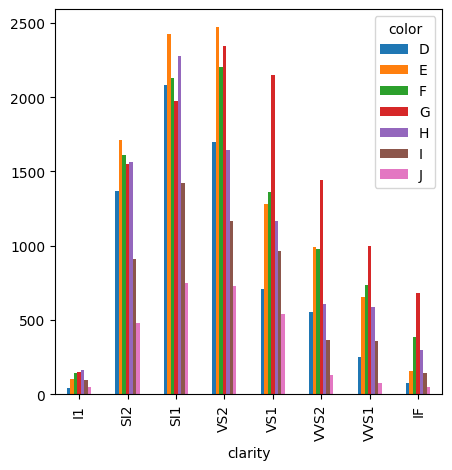

In [135]:
# show in group barplot
carat_table = carat_table.reindex(order)
carat_table.plot(
    kind='bar',
    figsize=(5,5),
    stacked=False
)

## Scatterplots

<Axes: xlabel='carat', ylabel='price'>

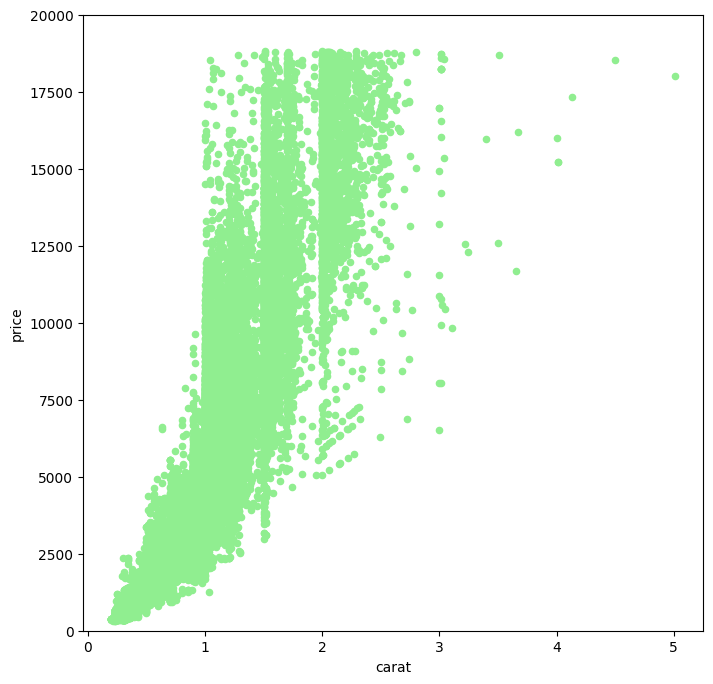

In [136]:
df.plot(
    kind='scatter',
    x='carat',
    y='price',
    figsize=(8,8),
    ylim=(0,20000),
    color='lightgreen'
)

In [137]:
# scatterplots are bivartiate plots that takes 2 numeric values and plot it on the x/y plane
# here we can see carat and price are positively correlated